### IMPORTING LIBRARIES

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install --upgrade pip
!pip install nltk
!pip install gensim
!pip install sklearn
!pip install wordcloud

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 435.7 kB/s eta 0:00:56
   ---------------------------------------- 0.0/24.0 MB 435.7 kB/s eta 0:00:56
   ---------------------------------------- 0.1/24.0 MB 491.5 kB/s eta 0:00:49
   ---------------------------------------- 0.1/24.0 MB 722.1 kB/s eta 0:00:34
   ---------------------------------------- 0.1/24.0 MB 655.8 kB/s eta 0:00:37
   ---------------------------------------- 0.2/24.0 MB 737.3 kB/s eta 0:00:33
   ---------------------------------------- 0.2/24.0 MB 737.3 kB/s eta 0:00:33
   ---------------------------------------- 0.2/24.0 MB 737.3 kB/s eta 0:00:33
    --------------------------------------- 0.3/24.0 MB 884.2 kB/s eta 0:00:27
    --------------------------------------- 0.3/24.0 MB 884.2 kB/s eta 0:00:27
    --------------------------------------- 0.4/24.0 MB 768.6 kB/s eta

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import gensim
from sklearn.metrics import classification_report, confusion_matrix

### LOADING THE DATASET

In [3]:
resume_df = pd.read_csv('data/resume_data.csv', encoding = 'latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [4]:
resume_df = resume_df[['resume_text', 'class']]
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


### EXPLORATORY DATA ANALYSIS

In [7]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [9]:
resume_df.describe().T

,count,unique,top,freq
resume_text,125,125,\rCustomer Service Supervisor/Tier - Isabella ...,1
class,125,2,not_flagged,92


In [6]:
resume_df.isnull().sum()

resume_text    0
class          0
dtype: int64

In [5]:
resume_df['class'].value_counts()

class
not_flagged    92
flagged        33
Name: count, dtype: int64

### Convert the data into a format that can be used for training the model
flagged =1,
not flagged =0

In [10]:
resume_df['class']=resume_df['class'].apply(lambda x:1 if x=='flagged'else 0)
resume_df

C:\Users\mosta\AppData\Local\Temp\ipykernel_13676\2473552675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df['class']=resume_df['class'].apply(lambda x:1 if x=='flagged'else 0)


,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


### Data Cleaning

In [15]:
## remove unwanted characters, numbers and symbols

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

resume_df['resume_text']=resume_df['resume_text'].apply(lambda x: x.replace('\r',' '))

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 'edu', 're', 'use', 'email', 'com'])

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mosta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mosta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella C...,0,customer
1,Engineer / Scientist - IBM Microelectronics D...,0,engineer
2,LTS Software Engineer Computational Lithograp...,0,lts
3,TUTOR Williston VT - Email me on Indeed: inde...,0,tutor
4,Independent Consultant - Self-employed Burlin...,1,independent
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.c...,0,brattleboro
121,Research and Teaching Assistant - University ...,0,research
122,Medical Coder - Highly Skilled - Entry Level ...,0,medical
123,Waterbury VT - Email me on Indeed: indeed.com...,1,waterbury


In [17]:
resume_df['cleaned']=resume_df['resume_text'].apply(preprocess)

resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella C...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics D...,0,engineer scientist ibm division westford alber...
2,LTS Software Engineer Computational Lithograp...,0,lts software engineer computational lithograph...
3,TUTOR Williston VT - Email me on Indeed: inde...,0,tutor williston alec schwartz work experience ...
4,Independent Consultant - Self-employed Burlin...,1,independent consultant self employed burlingto...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.c...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University ...,0,research teaching assistant university vermont...
122,Medical Coder - Highly Skilled - Entry Level ...,0,medical coder highly skilled entry level sudbu...
123,Waterbury VT - Email me on Indeed: indeed.com...,1,waterbury bec willing relocate authorized work...


In [18]:
resume_df['cleaned'][0]

'customer service supervisor tier isabella catalog company south burlington aecf work experience customer service supervisor tier isabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information proofreading administrative assistant events coordinator office services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects tra

### VISUALIZING CLEANED DATASETS

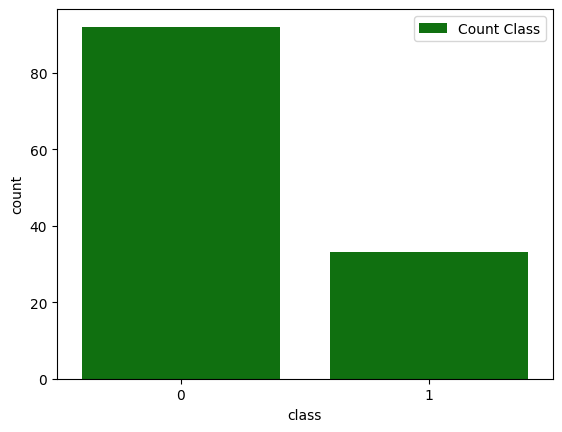

In [23]:
sns.countplot(x=resume_df['class'],label='Count Class',color='g')
plt.show()

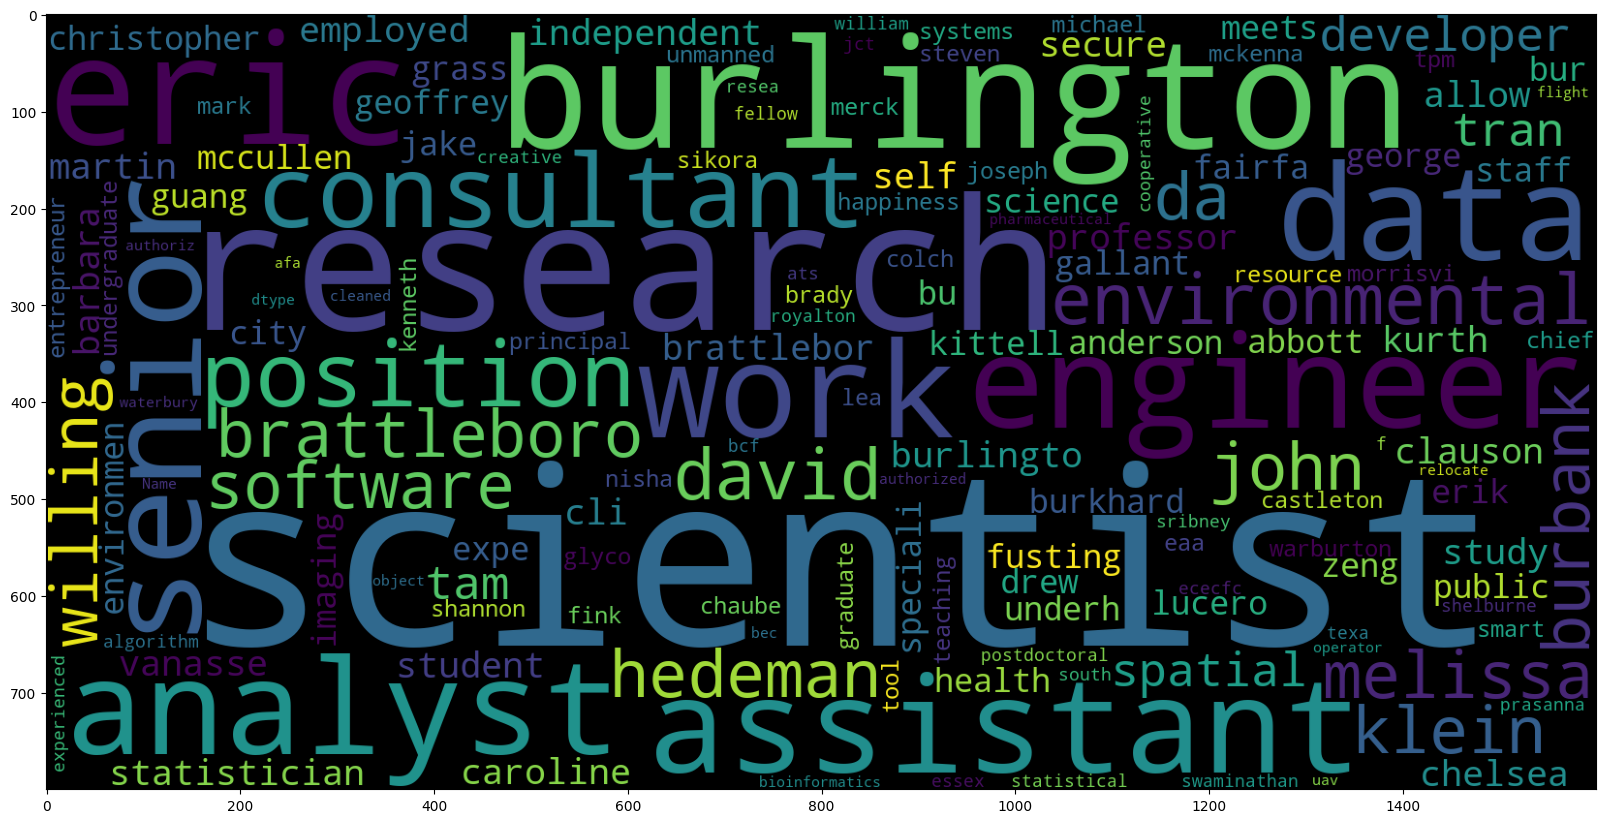

In [24]:
# FOR CLASS 1:
%matplotlib inline

plt.figure(figsize=(20,20))

wc=WordCloud(max_words=2000,width=1600, height = 800,stopwords = stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))

plt.imshow(wc)

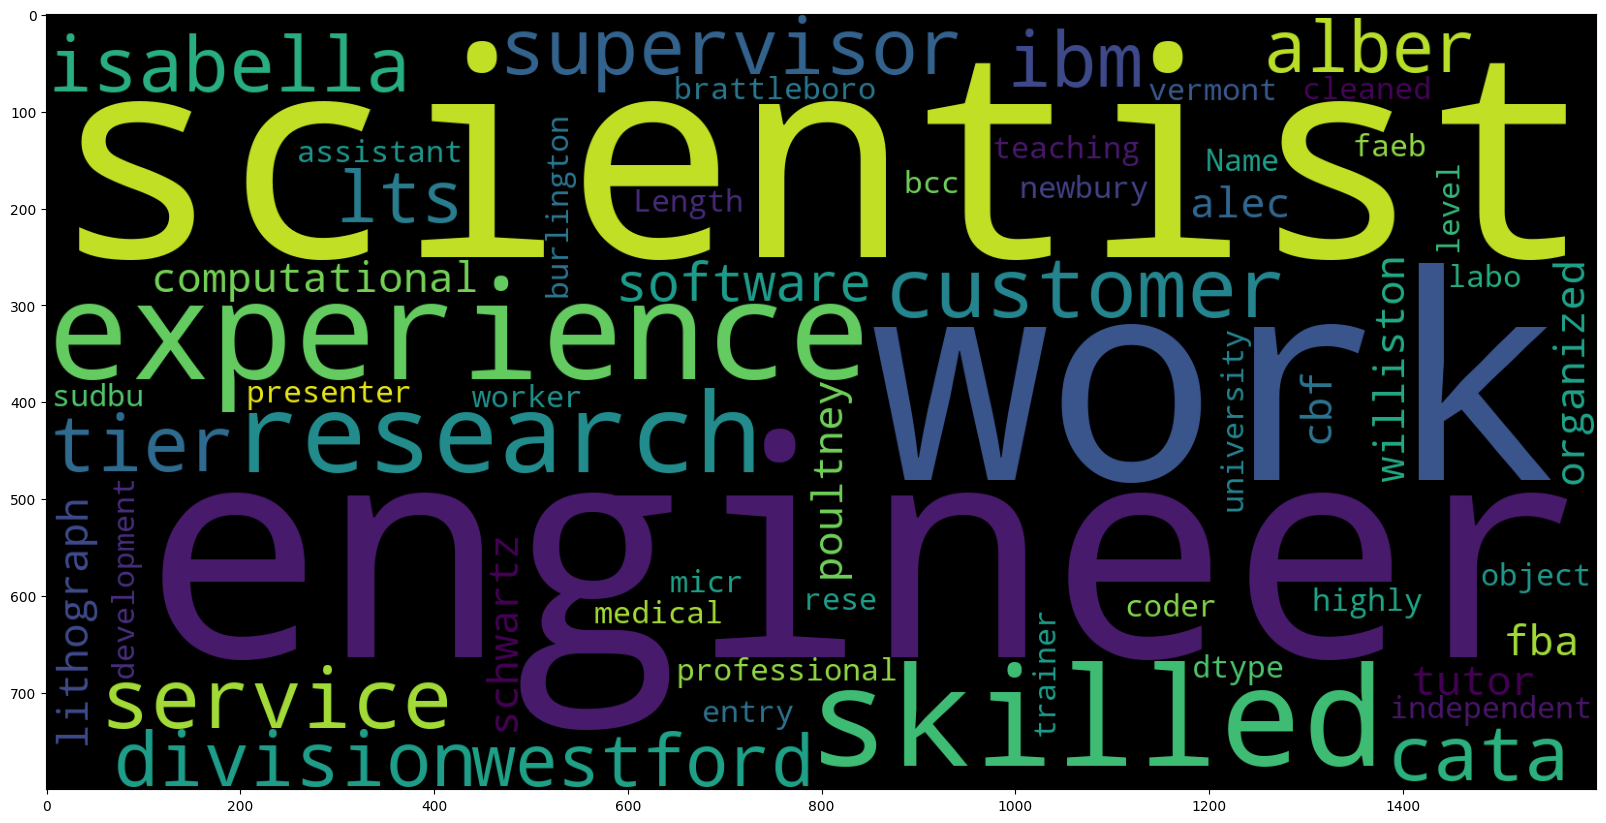

In [25]:
# FOR CLASS 0:
%matplotlib inline

plt.figure(figsize=(20,20))

wc2=WordCloud(max_words=2000,width=1600, height = 800,stopwords = stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))

plt.imshow(wc2)

### PREPARING THE DATA BY APPLYING COUNT VECTORIZATION

In [34]:
! pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:10
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:10
   ---------------------------------------- 0.1/10.6 MB 438.9 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.6 MB 438.9 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.6 MB 438.9 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.6 MB 438.9 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.6 MB 438.9 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.6 MB 313.8 kB/s eta 0:00:34
   -------------------

  You can safely remove it manually.


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
countvectorizer=vectorizer.fit_transform(resume_df['cleaned'])

print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [37]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TRAINING A NAIVE BAYES CLASSIFER

In [38]:
X=countvectorizer
y=resume_df['class']

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Bayes_clf=MultinomialNB(alpha=3)
Bayes_clf.fit(X_train,y_train)

MultinomialNB(alpha=3)

###  THE TRAINED MODEL

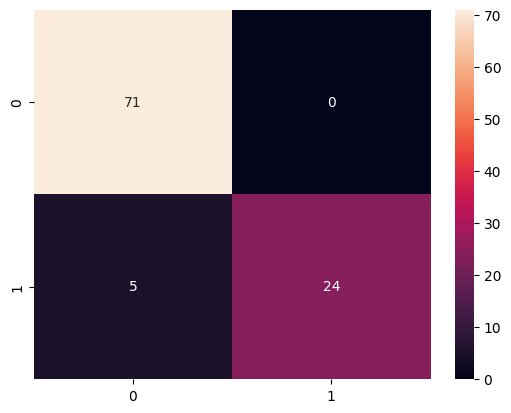

In [40]:
# 1) FOR TRAINING DATA

y_pred_train=Bayes_clf.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm,annot=True)

plt.show()

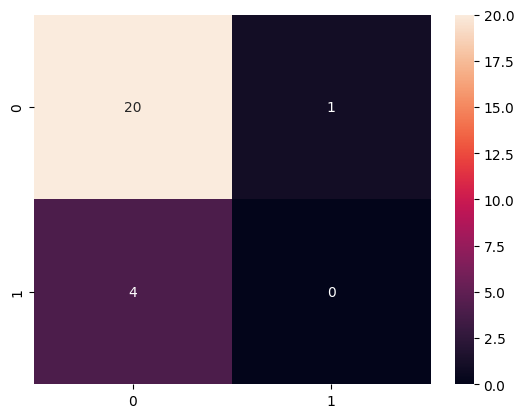

In [41]:
y_pred_test=Bayes_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred_test)

sns.heatmap(cm, annot=True)

plt.show()

In [42]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.00      0.00      0.00         4

    accuracy                           0.80        25
   macro avg       0.42      0.48      0.44        25
weighted avg       0.70      0.80      0.75        25



In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy of model on Train Dataset = {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy of model on Test Dataset = {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of model on Train Dataset = 0.95
Accuracy of model on Test Dataset = 0.8


In [44]:
print("Accuracy of model is = {}".format(accuracy_score(y_test, y_pred_test)))
print("F1 of model is = {}".format(f1_score(y_test, y_pred_test)))
print("Precision of model is = {}".format(precision_score(y_test, y_pred_test)))
print("Recall of model is = {}".format(recall_score(y_test, y_pred_test)))

Accuracy of model is = 0.8
F1 of model is = 0.0
Precision of model is = 0.0
Recall of model is = 0.0
